### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
insurance = pd.read_csv('insurance.csv') # Dataset okuma işlemi
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Perform An Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

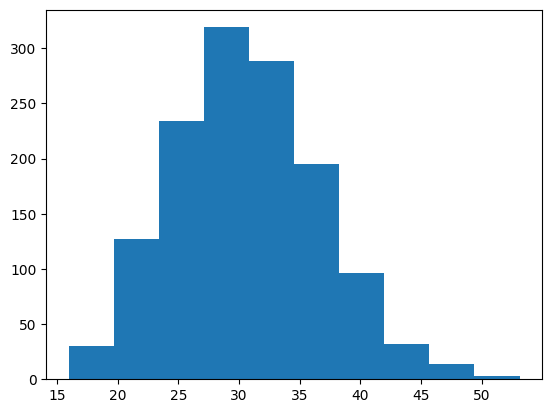

In [5]:
plt.hist(x='bmi',data=df) # histogram yöntemi ile bmi ın belli değer aralalıklarındaki veri sayılarını görüyorum

In [6]:
df.groupby('smoker').agg({'charges': 'mean'}) # sigara kullanma durumuna göre charges değişkeninin ortalama değerlerini görüyorum

,charges
smoker,
no,8434.268298
yes,32050.231832


<Axes: xlabel='region', ylabel='count'>

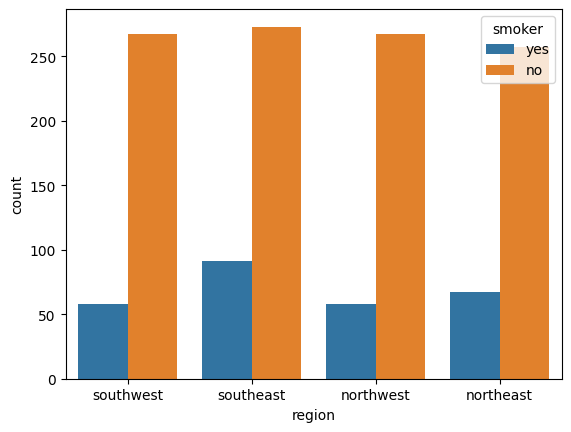

In [7]:
sns.countplot(x='region',data=df,hue='smoker') # bölgelere göre sigara içme dağolımını görüyorum

In [8]:
df.groupby('sex').agg({'bmi': 'mean'}) # cinsiyete göre ortalama bmi değerlerini inceliyorum.

,bmi
sex,
female,30.377749
male,30.943129


In [9]:
(df.groupby('region')['children'].sum()) # bölgelerre göre toplam çocuk sayılarını buldum ve en çok çocuk olan bölgenin southeast olduğu görebiliyorum.

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

<Axes: xlabel='age', ylabel='bmi'>

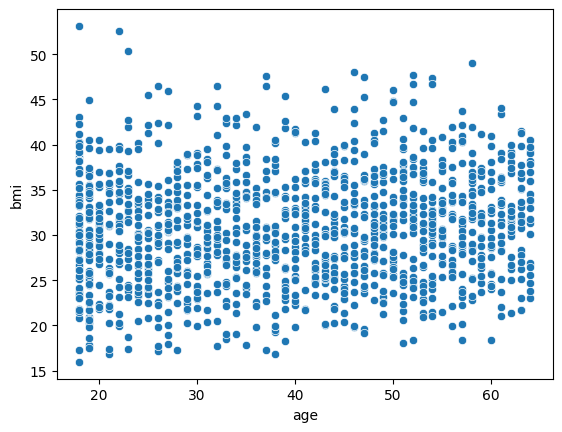

In [10]:
sns.scatterplot(x='age',y='bmi',data=df) # age değişkeni ile bmi değişkeni arasındaki ilişkiyi nokta yöntemi ile inceliyorum.

In [11]:
df.groupby('children').agg({'bmi': 'mean'}) # sahip olunan çocuk sayısına göre ortalam bmi değerlerini inceliyorum.

,bmi
children,
0,30.550296
1,30.623148
2,30.978104
3,30.684331
4,31.391200
5,29.605000


<Axes: >

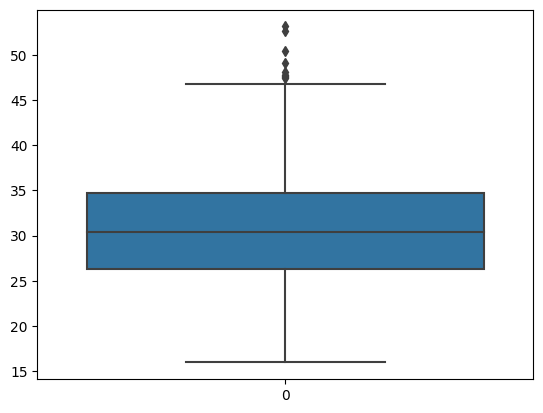

In [12]:
sns.boxplot(df['bmi'])  # bmi değişkenindeki aykırı değerleri boxplot yöntemi ile görebilyorum. 47den sonraki değerler aykırı veri gibi duruyor.

<Axes: xlabel='bmi', ylabel='charges'>

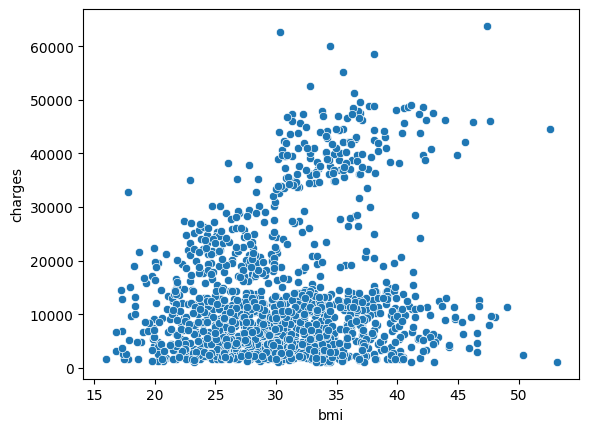

In [13]:
sns.scatterplot(x='bmi',y='charges',data=df) # bmi değişkeni ile charges değişkeni arasındaki ilişkiyi nokta yöntemi ile görebiliyorum.

<Axes: xlabel='region', ylabel='count'>

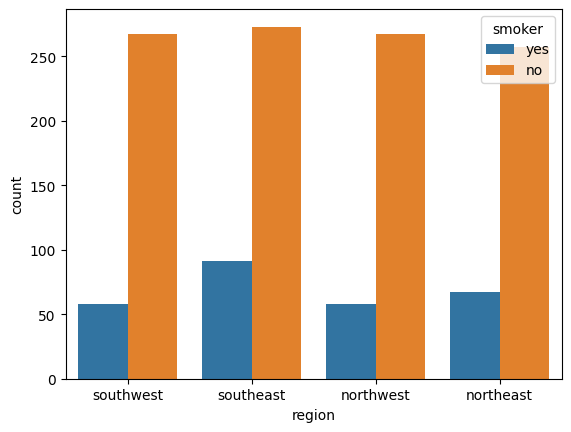

In [14]:
sns.countplot(x='region',data=df,hue='smoker')

In [15]:
df.groupby(['region','smoker']).agg({'bmi':'mean'}) # region ve smoker durumlarına göre ortalama bmi değerlerini inceleyebiliyorum.

bmi
region    smoker           
northeast no      29.332082
          yes     28.565224
northwest no      29.212678
          yes     29.140431
southeast no      33.442418
          yes     33.096703
southwest no      30.507865
          yes     31.005172

### Data Preprocessing

In [16]:
le = LabelEncoder()

encoded_sex = le.fit_transform(df['sex'])
encoded_smoker = le.fit_transform(df['smoker'])

df['sex'] = encoded_sex
df['smoker'] = encoded_smoker

# Bu kısımda Label Encoding yöntemi ile sex ve smoker kategorik değişkenlerinin verilerini eğitime uygun olması için 0 ve 1 haline getirdim


In [17]:
df = pd.get_dummies(df, columns=['region'])
df[['region_northeast','region_northwest','region_southeast','region_southwest']] = df[['region_northeast','region_northwest','region_southeast','region_southwest']].astype('int64')

# Bu kısımda One Hot Encoding yöntemini kullanarak region değişkeninin değerlerini binary değer olarak temsil ettim. 

In [18]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [19]:
X = df.drop('charges',axis=1)
y = df['charges']

# Feature değişkenlerini ve target değişkenini ayırdım.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# train_test_split fonksiyonunu kullanarak verileri belirtilen oranda train ve test verisi olarak böldüm. (%80 train, % test)

In [21]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
559,19,1,35.530,0,0,0,1,0,0
273,50,1,27.455,1,0,1,0,0,0
471,18,0,30.115,0,0,1,0,0,0
22,18,1,34.100,0,0,0,0,1,0
939,53,1,29.480,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1180,42,0,41.325,1,0,1,0,0,0
1147,20,0,31.920,0,0,0,1,0,0
527,51,0,25.800,1,0,0,0,0,1
1149,42,1,34.100,0,0,0,0,0,1


In [22]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model Selection

In [23]:
LinearReg = LinearRegression()
DecTree = DecisionTreeRegressor()
RandForest = RandomForestRegressor()
KNN = KNeighborsRegressor(n_neighbors=10)
SVM = SVR()


In [24]:
models = []

In [25]:
LinearReg_model = LinearReg.fit(X_train,y_train)
y_pred_linreg = LinearReg_model.predict(X_test)
models.append(LinearReg_model)

In [26]:
DecTree_model = DecTree.fit(X_train,y_train)
y_pred_DecTree = DecTree_model.predict(X_test)
models.append(DecTree_model)

In [27]:
RandForest_model= RandForest.fit(X_train,y_train)
y_pred_RandForest = RandForest_model.predict(X_test)
models.append(RandForest_model)

In [28]:
KNN_model = KNN.fit(X_train,y_train)
y_pred_KNN = KNN_model.predict(X_test)
models.append(KNN_model)

In [29]:
SVM_model = SVM.fit(X_train,y_train)
y_pred_SVM = SVM_model.predict(X_test)
models.append(SVM_model)

In [30]:
def cross_val(model):
    scores = cross_val_score(estimator= model, X= X_train, y= y_train, scoring="neg_mean_squared_error", cv=5)
    forest_reg_rmse_scores = np.sqrt(-scores)
    print(f'{model} RMSE: {forest_reg_rmse_scores.mean():.3f}')

   

for model in models:
    cross_val(model)

LinearRegression() RMSE: 5974.947
DecisionTreeRegressor() RMSE: 6518.129
RandomForestRegressor() RMSE: 4708.252
KNeighborsRegressor(n_neighbors=10) RMSE: 6091.450
SVR() RMSE: 12756.411


RMSE değeri en düşük olan Random Forest modelini seçiyorum.

### Hyper-parameter Optimization


In [31]:
# RandomForestRegressor
best_model = RandomForestRegressor()

# hyper-parameters
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(best_model, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_forest_model = grid_search.best_estimator_

In [32]:
best_forest_model

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

### Model Evaluation

In [33]:
y_pred = best_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R2: {r2:.3f}")

MSE: 28846832.166
RMSE: 5370.925
MAE: 3001.320
R2: 0.794


## Things I learned
- Cross valudation for model selection
- Grid Search for hyper-parameter optimization